#RNA synthesis of a ncRNA family

We want to design new RNA sequences whose traits comply with a given RNA family. 
For this purpose we use EDeN to come up with a notion of "importance" in
existing sequences, calculate sequence constraints based on this importance, and then utilize antaRNA for RNA inverse folding using these constraints. 

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [17]:
import logging
from eden.util import configure_logging
configure_logging(logging.getLogger(), verbosity=2, filename='rna.log')

*Define experimental parameters*

In [40]:
import numpy as np
data_fractions = list(np.linspace(0.2,0.4,6))
#print data_fractions

params = {'rfam_id':'RF02276',
          'antaRNA_params':'../evaluation/antaRNA.ini' ,
          'nt_importance_threshold':0 , 
          'nmin_important_nt_adjaceny':1 , 
          'bp_importance_threshold':0 ,
          'nmin_important_bp_adjaceny':1 , 
          'nmin_unpaired_nt_adjacency':1 , 
          'multi_sequence_size':5 , 
          'filtering_threshold':3 , 
          'batch_proportion':1 , 
          'data_fractions':data_fractions , 
          'experiment_repetitions':5,
          'split_ratio':0.4,
          'vectorizer_complexity':3,
          'negative_shuffle_ratio':5}

*Run the experiment*

In [37]:
%%time
from evaluation.PerformanceEvaluation import compute_learning_curves
roc_t , roc_s , apr_t , apr_s, data_fractions  = compute_learning_curves(params)

Starting RNA Synthesis experiment for RF02276 ...
Starting new HTTP connection (1): rfam.xfam.org
"GET /family/RF02276/alignment?acc=RF02276&format=fastau&download=0 HTTP/1.1" 200 2354
Training on data chunk 0/6 (data fraction: 0.200)
--------------------------------------------------------------------------------
run 1/5
Fit estimator on original data
Positive data: Instances: 1 ; Features: 1048577 with an avg of 1129 features per instance
Negative data: Instances: 9 ; Features: 1048577 with an avg of 1192 features per instance
Elapsed time: 1.0 secs
Evaluate estimator:
Test set
Instances: 87 ; Features: 1048577 with an avg of 1148 features per instance
--------------------------------------------------------------------------------
Test Estimate
             precision    recall  f1-score   support

         -1       0.88      0.93      0.91        72
          1       0.55      0.40      0.46        15

avg / total       0.82      0.84      0.83        87

APR: 0.619
ROC: 0.848
Fit e

*Plot the computed learning curves*

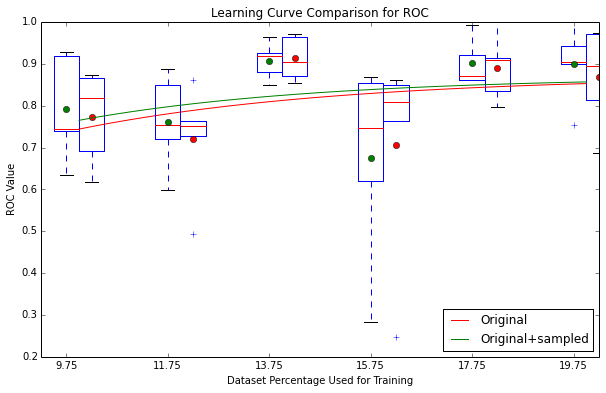

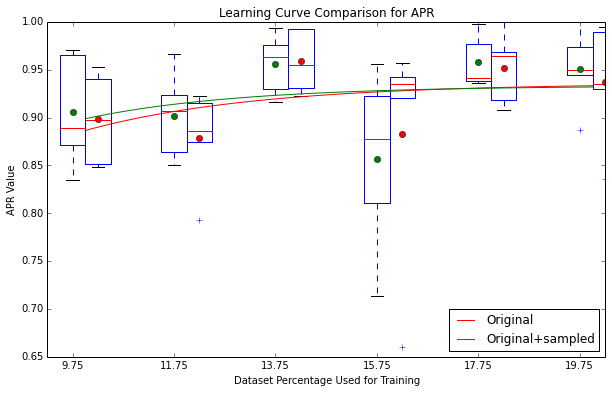

In [39]:
prefix='RF02276_v4_'
from evaluation.draw_utils import  draw_learning_curve
delta=0.005
scaling=50
draw_learning_curve(data_A=roc_t, data_B=roc_s, x=data_fractions, measure='ROC', delta=delta, scaling=scaling, fname=prefix + 'roc.pdf')
draw_learning_curve(data_A=apr_t, data_B=apr_s, x=data_fractions, measure='APR', delta=delta, scaling=scaling, fname=prefix + 'apr.pdf')